In [9]:
import numpy as np 
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

In [10]:
%%time
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('Users\avija\leapGestRecog\00'):
    if not j.startswith('.'): 
                              
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

<unknown>:4: SyntaxWarning: invalid escape sequence '\l'


ValueError: listdir: embedded null character in path

In [11]:
%%time
x_data = []
y_data = []
datacount = 0 
for i in range(0, 10): 
    for j in os.listdir('Users\avija\leapGestRecog\00' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('Users\avija\leapGestRecog\00' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('Users\avija\leapGestRecog\00' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

<unknown>:5: SyntaxWarning: invalid escape sequence '\l'
<unknown>:8: SyntaxWarning: invalid escape sequence '\l'
<unknown>:11: SyntaxWarning: invalid escape sequence '\l'


ValueError: listdir: embedded null character in path

In [12]:
%%time
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

TypeError: list indices must be integers or slices, not tuple

In [13]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [ ]:
from keras import layers
from keras import models

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
%%time
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/5
250/250 [==============================] - 70s 277ms/step - loss: 0.3195 - accuracy: 0.8988 - val_loss: 0.0143 - val_accuracy: 0.9970
Epoch 2/5
250/250 [==============================] - 74s 297ms/step - loss: 0.0218 - accuracy: 0.9956 - val_loss: 0.0042 - val_accuracy: 0.9985
Epoch 3/5
250/250 [==============================] - 69s 276ms/step - loss: 0.0109 - accuracy: 0.9974 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 4/5
250/250 [==============================] - 70s 278ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0060 - val_accuracy: 0.9990
Epoch 5/5
250/250 [==============================] - 71s 282ms/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.0056 - val_accuracy: 0.9990
CPU times: user 37min 32s, sys: 2min 29s, total: 40min 1s
Wall time: 5min 55s


In [ ]:
%%time
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 3s 42ms/step - loss: 1.5090e-06 - accuracy: 1.0000
Accuracy:1.0
CPU times: user 15.6 s, sys: 1.15 s, total: 16.7 s
Wall time: 2.93 s


In [ ]:
%%time
# Model weights and model
model.save_weights('gesture_model_weights.h5')
model.save("gesture_model.h5")

CPU times: user 32.1 ms, sys: 22.8 ms, total: 54.9 ms
Wall time: 68.4 ms


/Users/manisha/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import image
import numpy as np

In [ ]:
model.save('gesture_recognition_model.h5')


# model.save_weights('gesture_recognition_model_weights.h5')

In [ ]:
from keras.models import load_model

loaded_model = load_model('gesture_recognition_model.h5')

#loaded_model.load_weights('gesture_recognition_model_weights.h5')

In [ ]:
from keras.preprocessing import image
import numpy as np

In [ ]:
t_test = []

datacount = 0 # We'll use this to tally how many images are in our dataset
folder_path = '/Users/manisha/Downloads/TEST'

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
       
        img_path = os.path.join(folder_path, filename)
        count = 0 # To tally images of a given gesture

        
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((320, 120))
        arr = np.array(img)
        t_test.append(arr)
        count = count + 1
        
    datacount = datacount + count
t_test = np.array(t_test, dtype = 'float32')

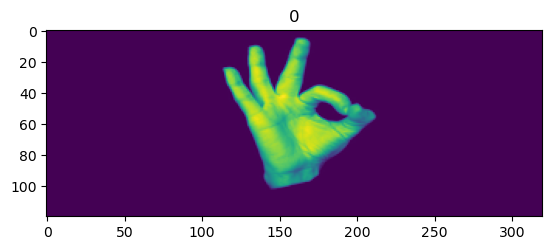

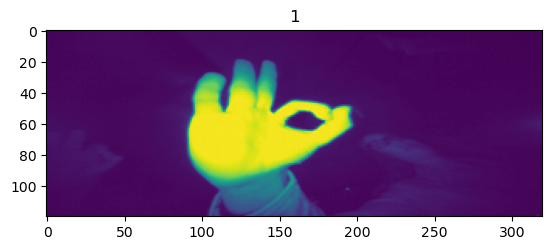

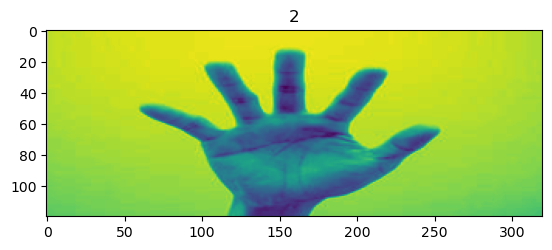

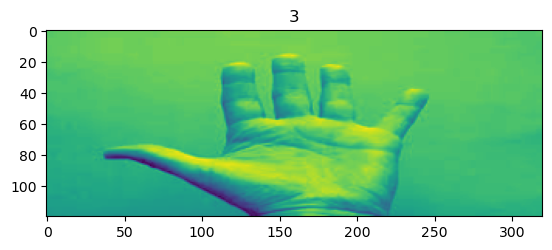

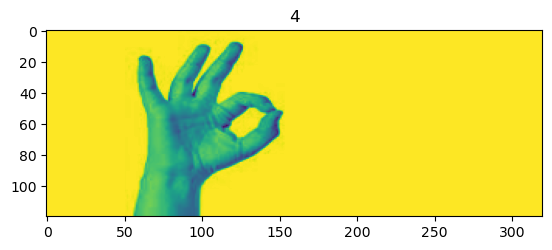

In [ ]:
for i in range(0, 5):
    plt.imshow(t_test[i , :, :])
    plt.title(i)
    plt.show()

1/1 [==============================] - 0s 14ms/step


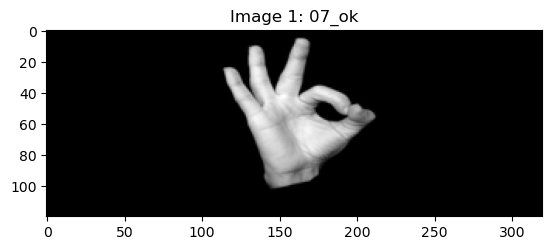

1/1 [==============================] - 0s 13ms/step


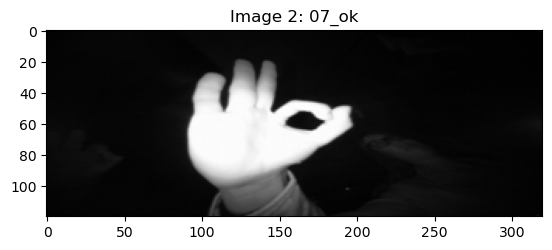

1/1 [==============================] - 0s 15ms/step


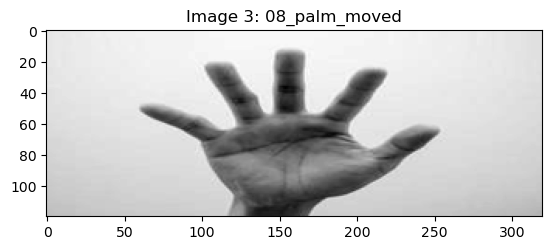

1/1 [==============================] - 0s 14ms/step


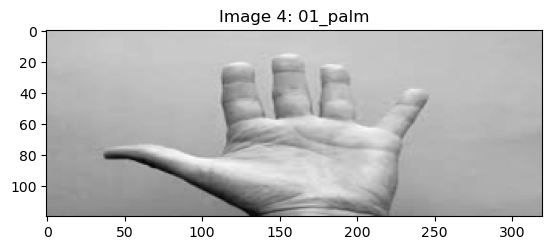

1/1 [==============================] - 0s 13ms/step


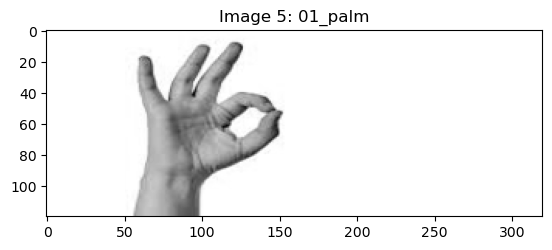

1/1 [==============================] - 0s 13ms/step


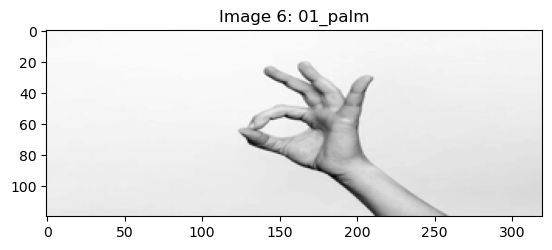

1/1 [==============================] - 0s 13ms/step


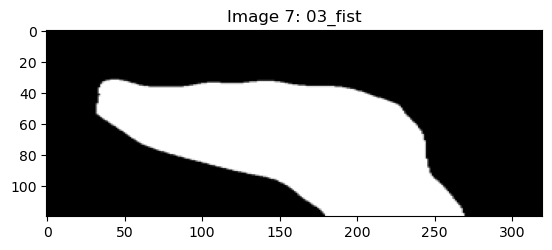

1/1 [==============================] - 0s 15ms/step


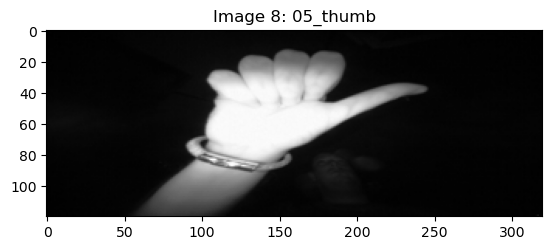

1/1 [==============================] - 0s 14ms/step


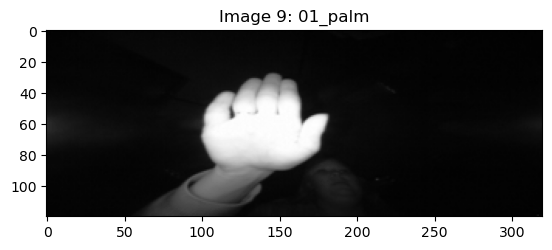

1/1 [==============================] - 0s 13ms/step


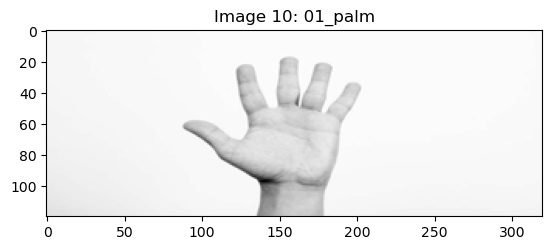

1/1 [==============================] - 0s 15ms/step


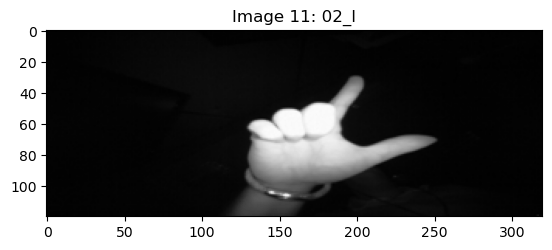

1/1 [==============================] - 0s 14ms/step


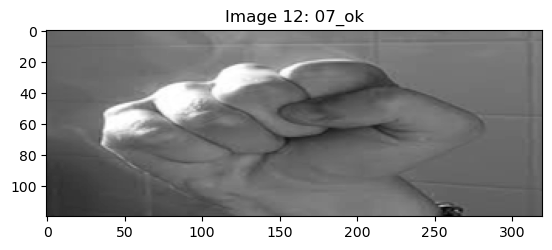

1/1 [==============================] - 0s 14ms/step


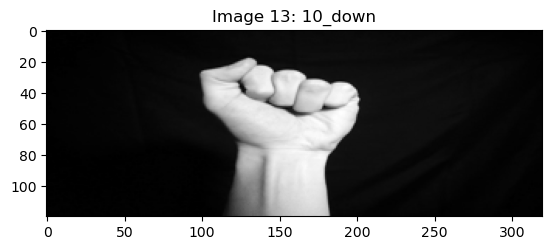

1/1 [==============================] - 0s 16ms/step


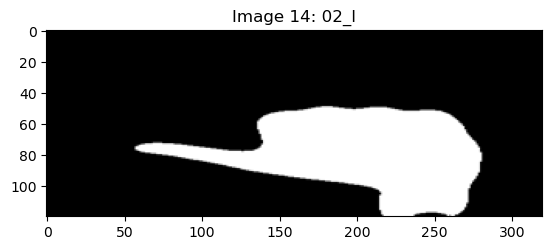

Predicted Gestures: ['07_ok', '07_ok', '08_palm_moved', '01_palm', '01_palm', '01_palm', '03_fist', '05_thumb', '01_palm', '01_palm', '02_l', '07_ok', '10_down', '02_l']


In [ ]:
predicted_gestures = []

for i in range(t_test.shape[0]):
    img_show = t_test[i].reshape(120,320)  
    
    img2 = img_show.reshape(1, 120, 320, 1)  
    img2 /= 255.0  
    
    predictions = loaded_model.predict(img2)
 
    predicted_class = np.argmax(predictions)
    predicted_gesture = reverselookup[predicted_class]
    predicted_gestures.append(predicted_gesture)
    
    plt.imshow(img_show, cmap='gray') 
    
    plt.title(f"Image {i + 1}: {predicted_gesture}")
    plt.show()
print("Predicted Gestures:", predicted_gestures)

1/1 [==============================] - 0s 13ms/step
Predicted Gestures: ['07_ok', '07_ok', '08_palm_moved', '01_palm', '01_palm', '01_palm', '03_fist', '05_thumb', '01_palm', '01_palm', '02_l', '07_ok', '10_down', '02_l']


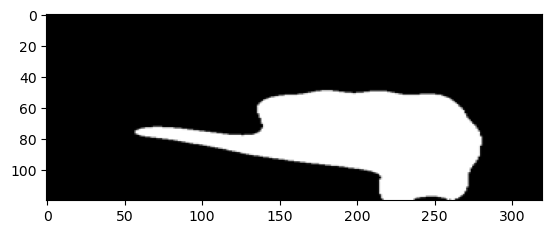

In [ ]:
import matplotlib.pyplot as plt

 
folder_path = '/Users/manisha/Downloads/TEST'

 
predicted_gestures = []
 
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        
        img_path = os.path.join(folder_path, filename)

       
        img = Image.open(img_path).convert('L') 
        img = img.resize((320, 120))
        arr = np.array(img)
        t_test = arr.reshape((1, 120, 320, 1))
        t_test = t_test / 255.0
        plt.imshow(arr, cmap='gray')

   
        predictions = loaded_model.predict(t_test)

 
        predicted_class = np.argmax(predictions)
        predicted_gesture = reverselookup[predicted_class]
        predicted_gestures.append(predicted_gesture)

print("Predicted Gestures:", predicted_gestures)